In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Housing.csv')

In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [107]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## EDA

In [9]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

<Axes: xlabel='bedrooms'>

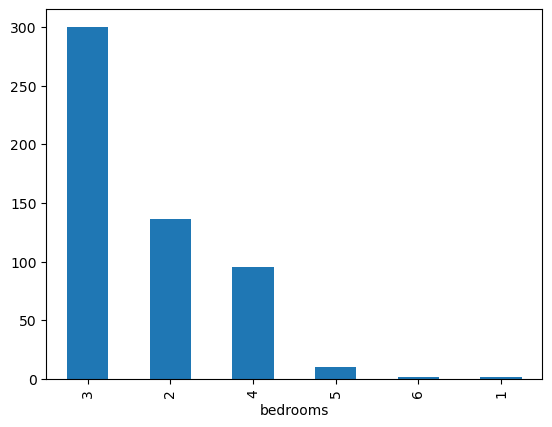

In [10]:
df['bedrooms'].value_counts().plot(kind='bar')

In [11]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [12]:
df['price'].max()

13300000

In [13]:
# df['price'][(df['bedrooms'] == 6)]
df[(df['bedrooms'] == 6)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
395,3500000,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished


In [14]:
df[(df['bathrooms'] == 4)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


(array([ 73., 198., 117.,  88.,  39.,  15.,   8.,   5.,   0.,   2.]),
 array([ 1650.,  3105.,  4560.,  6015.,  7470.,  8925., 10380., 11835.,
        13290., 14745., 16200.]),
 <BarContainer object of 10 artists>)

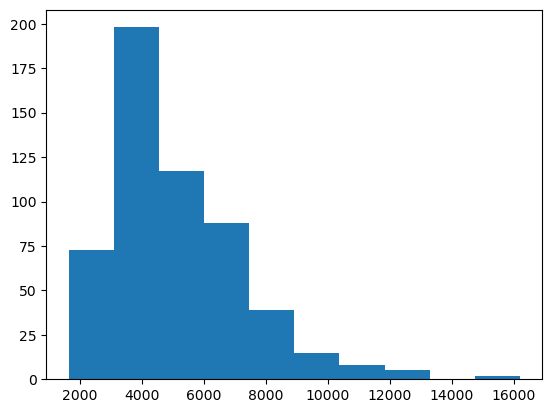

In [15]:
plt.hist(x=df['area'])

<Axes: xlabel='price'>

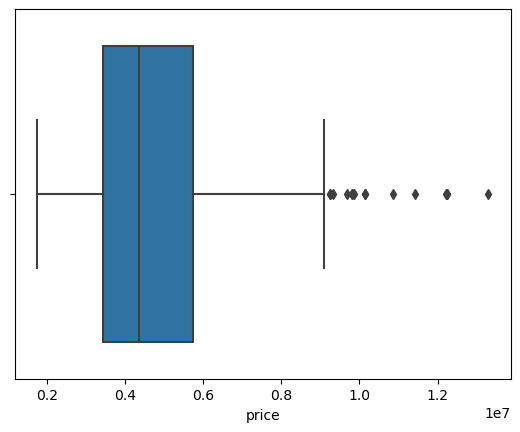

In [16]:
sns.boxplot(x=df['price'])

<Axes: xlabel='area', ylabel='price'>

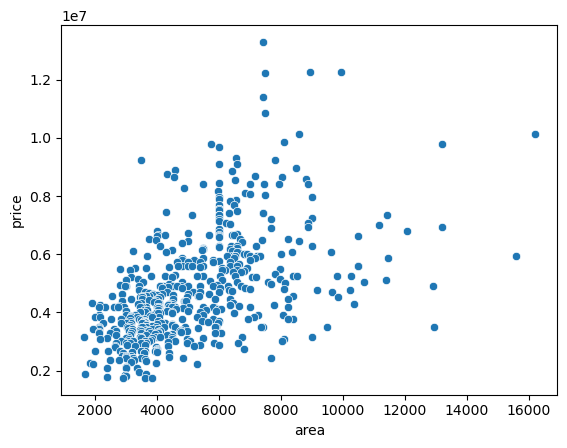

In [17]:
sns.scatterplot(x=df['area'],y=df['price'])
# we need to perform standardization because range of values for these 2 cols differ greatly

<Axes: xlabel='area', ylabel='price'>

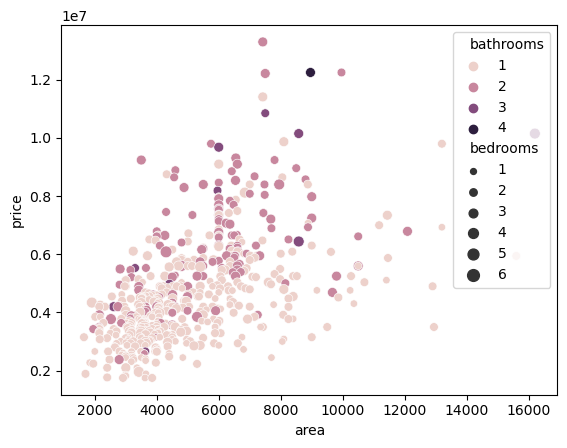

In [18]:
sns.scatterplot(x=df['area'],y=df['price'],hue=df['bathrooms'],size=df['bedrooms'])

<Axes: xlabel='stories', ylabel='price'>

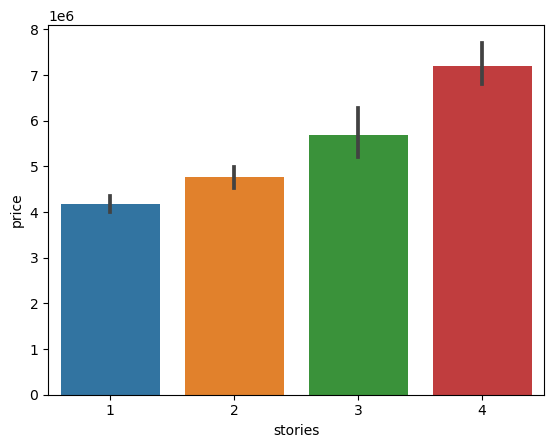

In [19]:
sns.barplot(x=df['stories'],y=df['price']) # as number of stories increases, avg price increases

<Axes: xlabel='hotwaterheating', ylabel='price'>

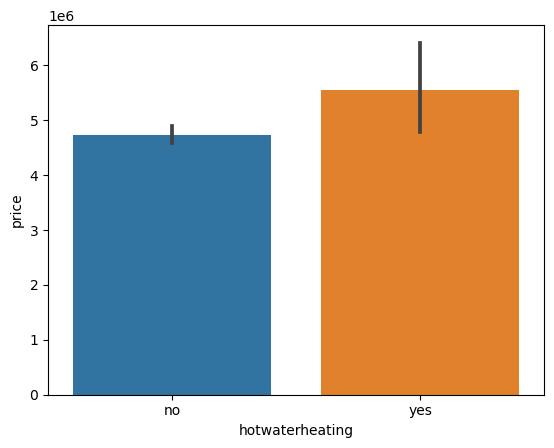

In [20]:
sns.barplot(x=df['hotwaterheating'],y=df['price'])

<Axes: xlabel='airconditioning', ylabel='price'>

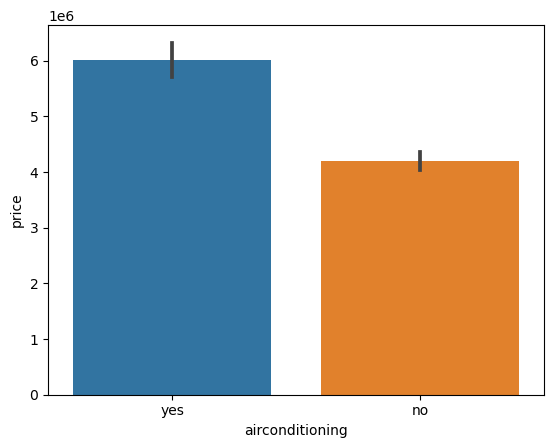

In [21]:
sns.barplot(x=df['airconditioning'],y=df['price'])

<Axes: xlabel='hotwaterheating', ylabel='price'>

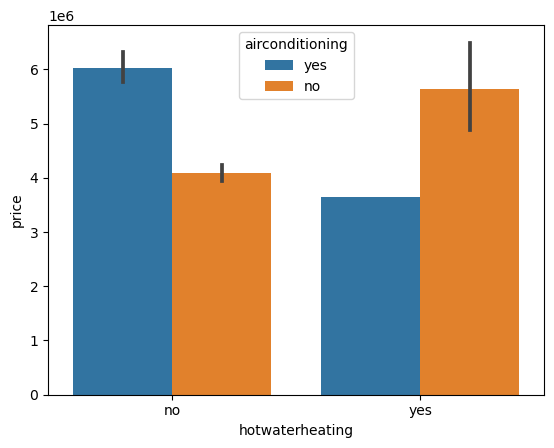

In [22]:
sns.barplot(x=df['hotwaterheating'],y=df['price'], hue=df['airconditioning'])

interesting insight: heating + no ac and no heating+ac houses have higher prices on an avg. This could be because heating/ac represents the geographical location of the house

In [23]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

<Axes: xlabel='furnishingstatus', ylabel='price'>

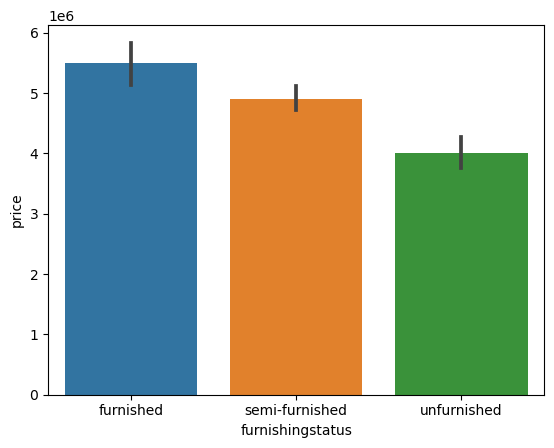

In [24]:
sns.barplot(x=df['furnishingstatus'], y=df['price'])
# furninshing perhaps doesn't make a huge difference
# furnished houses tend to be more expensive with an avg of 5.5 million
# unfurnished houses, on an avg, have lower prices. avg is approx 4 million

<Axes: xlabel='furnishingstatus', ylabel='price'>

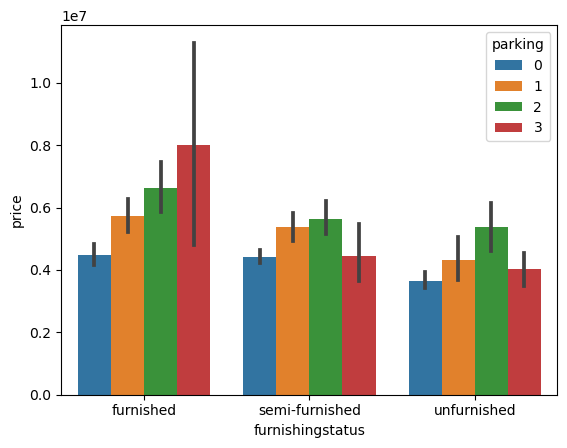

In [25]:
sns.barplot(x=df['furnishingstatus'], y=df['price'], hue=df['parking'])
# furnished houses with 3 parkings have higher prices but semi-furnished/unfurnished houses with 3 parking
# have less price compared to those with 2 parking

<Axes: xlabel='furnishingstatus', ylabel='price'>

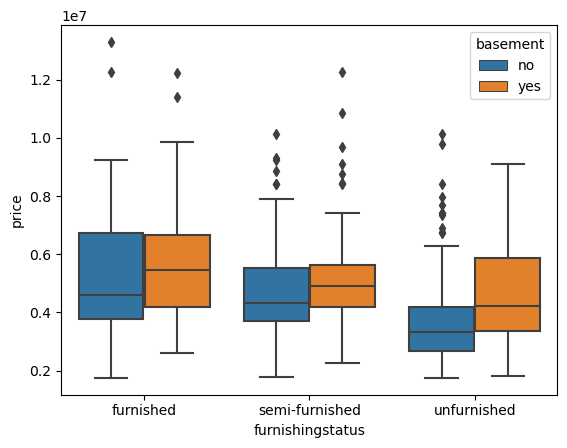

In [26]:
sns.boxplot(x=df['furnishingstatus'],y=df['price'], hue=df['basement'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10460\3343084390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['mainroad']=='yes']['price'],hist=False,color='red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10460\3343084390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

<Axes: xlabel='price', ylabel='Density'>

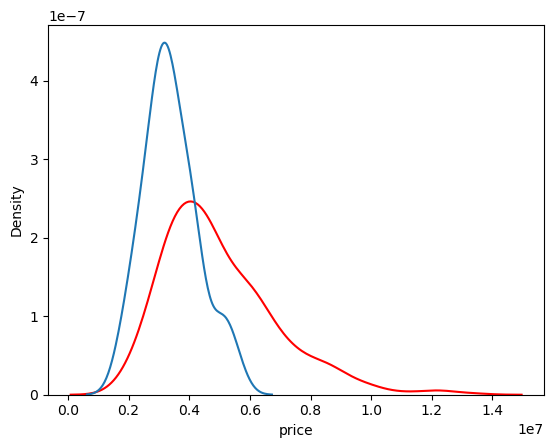

In [27]:
sns.distplot(df[df['mainroad']=='yes']['price'],hist=False,color='red')
sns.distplot(df[df['mainroad']=='no']['price'],hist=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


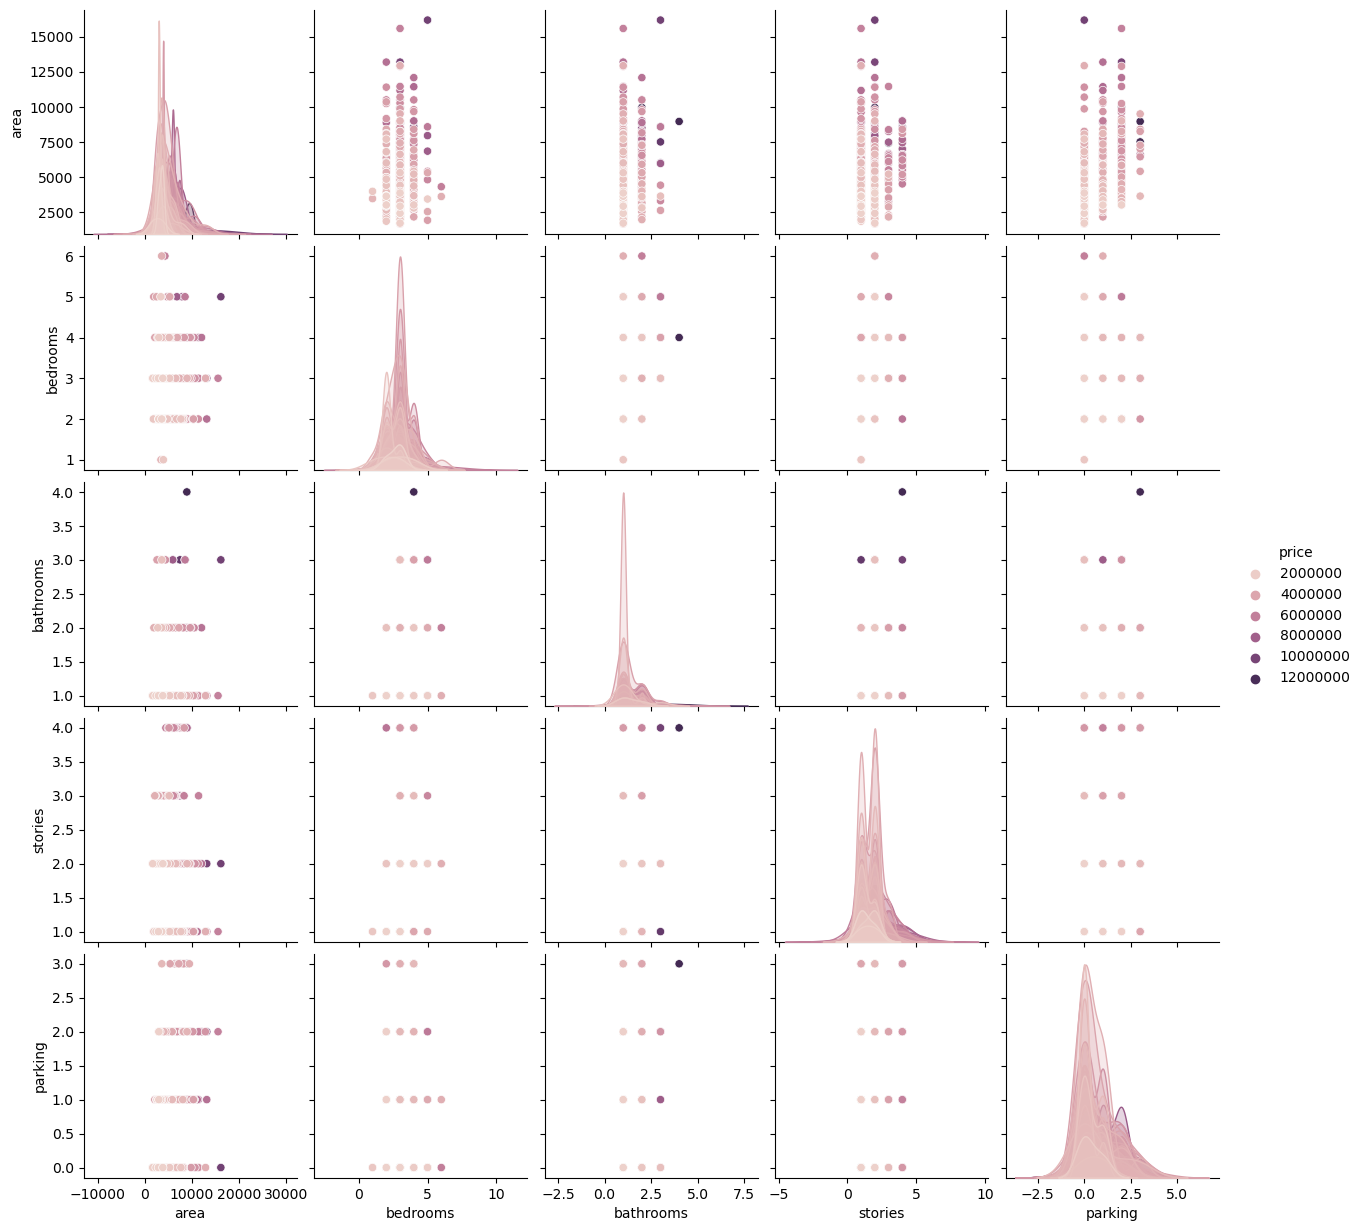

In [28]:
sns.pairplot(df,hue='price')

## ENCODING

In [29]:
df.replace({'yes':1,'no':0},inplace=True)

In [30]:
df=df.drop('furnishingstatus',axis=1)

## OUTLIER DETECTION AND REMOVAL

In [32]:
# IQR RANGE
def outliers_iqr(df):
    for col in df.columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=(Q3-Q1)
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        outliers=df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        print(f"outliers for {col} are {outliers}")
outliers_iqr(df)

outliers for price are 15
outliers for area are 12
outliers for bedrooms are 12
outliers for bathrooms are 1
outliers for stories are 41
outliers for mainroad are 77
outliers for guestroom are 97
outliers for basement are 0
outliers for hotwaterheating are 25
outliers for airconditioning are 0
outliers for parking are 12
outliers for prefarea are 128


In [33]:
# z-score
threshold = 3
def outliers_zscore(df):
    for col in df.columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df[z_scores > threshold].shape[0]
        print(f"outliers for {col} are {outliers}")

outliers_zscore(df)

outliers for price are 6
outliers for area are 7
outliers for bedrooms are 2
outliers for bathrooms are 11
outliers for stories are 0
outliers for mainroad are 0
outliers for guestroom are 0
outliers for basement are 0
outliers for hotwaterheating are 25
outliers for airconditioning are 0
outliers for parking are 0
outliers for prefarea are 0


In [34]:
#outlier removal using quantile based flooring and capping: - mse down from 1.8trillion to 1.5
def outlier_capping(df):
    for col in df.columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
        df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
outlier_capping(df)

In [ ]:
# outlier removal using mean value and zcore - not using it because it made no difference to mse
# def outlier_avg(df,threshold): 
#     for col in df.columns:
#         z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
#         outlier_indices = z_scores > threshold
#         df.loc[outlier_indices, col] = df[col].mean()
# outlier_avg(df,3)  

## FEATUERE SELECTION

In [31]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382


In [36]:
# feature selection using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
#lr = LinearRegression()

# Initialize the RFE selector with the linear regression model - first tried with estimator = lr
selector = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5, step=1)

# Fit the RFE selector on the training data
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['area', 'bathrooms', 'basement', 'airconditioning', 'parking'], dtype='object')


In [37]:
# regularization for feature selection - L1

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['price'])  
y = df['price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_scaled, y)

# Get coefficients and corresponding feature names
coefficients = lasso.coef_
feature_names = X.columns

# Identify non-zero coefficients and corresponding feature names
selected_features = [feature_names[i] for i in range(len(feature_names)) if coefficients[i] != 0]

print("Selected features:", selected_features)


Selected features: ['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']


## MODEL TRAINING AND METRICS

### Gradient Boosting Regression

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]
# .drop('price',axis=1)
y=df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.18, max_depth=2, random_state=42,criterion='squared_error')

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2=r2_score(y_test,y_pred)
print("r2 score: ",r2)



Mean Squared Error: 1459048312637.7083
r2 score:  0.6388397617857653


### Linear Regression

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)

# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

x_test_scaled=scaler.transform(x_test)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred=lr.predict(x_test_scaled)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 1509999878896.0037
R-squared: 0.6262276504198523


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]
# .drop('price',axis=1)
y=df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(max_features=None,n_estimators=500, random_state=42,min_samples_leaf=120)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.06422018348623854


Cross validation - not of much help

In [101]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]
# .drop('price',axis=1)
y=df['price']

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Define Cross-Validation Strategy
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform Cross-Validation
scores = cross_val_score(gb_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Evaluate Cross-Validation Results
print("Cross-Validation Mean Squared Error:", -scores.mean())
print("Selected parameters:", gb_model.get_params())



Cross-Validation Mean Squared Error: 1215710117291.4502
Selected parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [100]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]
# .drop('price',axis=1)
y=df['price']

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Define Cross-Validation Strategy
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform Cross-Validation
scores_r2 = cross_val_score(gb_model, X, y, cv=kf, scoring='r2')

# Evaluate Cross-Validation Results
print("Cross-Validation R-squared Score:", scores_r2.mean())


Cross-Validation R-squared Score: 0.5847937176135222


### Multiple Linear Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Split data into features and target variable
X= df[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]
y=df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#scaling
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


# Initialize the polynomial features object
degree = 1  # Specify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

# Transform the features to polynomial features
x_train_scaled_poly = poly_features.fit_transform(x_train_scaled)
x_test_scaled_poly = poly_features.transform(x_test_scaled)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(x_train_scaled_poly, y_train)

# Predict on the test data
y_pred = model.predict(x_test_scaled_poly)

# Calculate Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


R2 score: 0.6262276504198523


## STATISTICAL SUMMARY

In [41]:
import statsmodels.api as sm

# Assuming x_train_scaled contains your independent variables and y_train contains your dependent variable

# Add a constant term for the intercept
X_train_scaled_with_intercept = sm.add_constant(x_train_scaled)

# Fit the regression model
model = sm.OLS(y_train, X_train_scaled_with_intercept).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           7.86e-91
Time:                        16:20:47   Log-Likelihood:                -6642.3
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     428   BIC:                         1.333e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.68e+06   4.84e+04     96.786      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
